# Microsoft KBs Analysis

## What KB data sources do we have?

```{mermaid}

graph TD
    A[winbindex] --> B[KBs]
    C[ms support feeds] -->B
    B --> D[List of updated Binaries]
    B --> E[Release dates]
    B --> F[Build Versions]
```


### winbindex

Winbindex pulls Windows OS Builds by [scraping the Windows update pages](https://github.com/m417z/winbindex/blob/gh-pages/data/upd01_get_list_of_updates.py) for Windows 10 and 11 Updates from: 
- https://support.microsoft.com/en-us/help/4000823
- https://support.microsoft.com/en-us/help/5006099

It has several more steps in it's [workflow](https://github.com/m417z/winbindex/tree/gh-pages/data#winbindex-flow-of-scripts). 

The `cvedata` code that parses the winbindex data is here [winbindex.py](https://github.com/clearbluejar/cvedata/blob/main/cvedata/winbindex.py)

### MS Atom RSS Feeds KBs

MS Feeds KBs relies on:  https://support.microsoft.com/en-us/rss-feed-picker

The `cvedata` code is here [ms_feed_kbs.py](https://github.com/clearbluejar/cvedata/blob/main/cvedata/ms_feed_kbs.py)

Pulling data from 

- WIN10_FEED_URL = "https://support.microsoft.com/en-us/feed/atom/6ae59d69-36fc-8e4d-23dd-631d98bf74a9"
- WIN11_FEED_URL = "https://support.microsoft.com/en-us/feed/atom/4ec863cc-2ecd-e187-6cb3-b50c6545db92"
- WIN_SERVER_2022_FEED_URL = "https://support.microsoft.com/en-us/feed/atom/2d67e9fb-2bd2-6742-08ee-628da707657f"
- WIN_SERVER_2019_FEED_URL = "https://support.microsoft.com/en-us/feed/atom/eb958e25-cff9-2d06-53ca-f656481bb31f"
- WIN_SERVER_2016_FEED_URL = "https://support.microsoft.com/en-us/feed/atom/c3a1be8a-50db-47b7-d5eb-259debc3abcc"

## Import cvedata

In [1]:
from cvedata.ms_feed_kbs import get_ms_kb_to_bins_json
from cvedata.winbindex import get_winbindex_kbs_to_bin_map
from cvedata.msrc_pandas import get_msrc_cvrf_pandas_df
import pandas as pd

wb_kbs = get_winbindex_kbs_to_bin_map()
ms_kbs = get_ms_kb_to_bins_json()
msrc_pandas = get_msrc_cvrf_pandas_df()

### Winbindex KB Data

In [2]:
wb_kbs_df = pd.DataFrame.from_dict(wb_kbs, orient='index')
wb_kbs_df['bin count'] = wb_kbs_df['updated'].apply(lambda x: len(x))
without_bins = wb_kbs_df[wb_kbs_df['bin count'] == 0].index
wb_kbs_df = wb_kbs_df.drop(without_bins)
wb_kbs_df.sort_values(by=['bin count'], ascending=False)


,updated,versions,release,url,build,bin count
KB5012643,"[icsvcext.dll, mqbkup.exe, windows.ui.biofeedb...",[11-21H2],2022-04-25,https://support.microsoft.com/help/5012643,22000.652,3868
KB4598242,"[wininet.dll, appvpolicy.dll, windows.ui.biofe...",[2004],2021-01-12,https://support.microsoft.com/help/4598242,19041.746,3177
KB4598230,"[wininet.dll, appvpolicy.dll, windows.ui.biofe...",[1809],2021-01-12,https://support.microsoft.com/help/4598230,17763.1697,2982
KB5017389,"[icsvcext.dll, wininet.dll, appvpolicy.dll, wi...",[11-22H2],2022-09-30,https://support.microsoft.com/help/5017389,22621.608,2851
KB4598245,"[wininet.dll, appvpolicy.dll, windows.ui.biofe...",[1803],2021-01-12,https://support.microsoft.com/help/4598245,17134.1967,2705
...,...,...,...,...,...,...
KB4522014,[jscript.dll],[1803],2019-09-23,https://support.microsoft.com/help/4522014,17134.1009,1
KB4522012,[jscript.dll],[1709],2019-09-23,https://support.microsoft.com/help/4522012,16299.1392,1
KB4522011,[jscript.dll],[1703],2019-09-23,https://support.microsoft.com/help/4522011,15063.2046,1
KB4534321,[slbmux.sys],[1809],2020-01-23,https://support.microsoft.com/help/4534321,17763.1012,1


### MS feeds KB Data

In [3]:
ms_kbs_df = pd.DataFrame.from_dict(ms_kbs).sort_values(by=['bin count'], ascending=False)
ms_kbs_df

,updated,build,release,bin count
KB5012643,"[1394ohci.sys, 4mmdat.sys, 61883.sys, AAD.Core...",22000.65200,2022-04-25,3339
KB5017389,"[1394ohci.sys, 6bea57fb-8dfb-4177-9ae8-42e8b35...",22621.60800,2022-09-30,2301
KB4598243,"[Aad.core.dll, Aadtb.dll, Abovelockapphost.dll...",14393.41690,2021-01-12,2075
KB4598245,"[Aad.core.dll, Aadtb.dll, Aadwamextension.dll,...",17134.19670,2021-01-12,2064
KB4598231,"[Aad.core.dll, Aadtb.dll, Abovelockapphost.dll...",10240.18818,2021-01-12,1587
...,...,...,...,...
KB4512495,[Oleaut32.dll],14393.31810,2019-08-17,1
KB5010690,[Windows.System.Profile.RetailInfo.dll],22000.46700,2022-01-25,1
KB4509475,[Shutdownux.dll],14393.30560,2019-06-27,1
KB4503267,[Ieframe.dll],14393.30250,2019-06-11,1


### How many unique KBs do we have information for?

In [4]:

wb_kbs_df.index.union(ms_kbs_df.index).shape[0]


729

## MSRC CVEs with KB data

Source - [MSRC CVEs](https://msrc.microsoft.com/update-guide/vulnerability)

In [5]:
msrc_df = pd.DataFrame.from_dict(get_msrc_cvrf_pandas_df())
msrc_df

,Initial Release,Title,Tag,Impact,CVSS,KBs,Versions,Acks
CVE-2021-40441,2021-12-14,Windows Media Center,Windows Media,Elevation of Privilege,7.8,KB5008244 KB5008255 KB5008263 KB5008277 KB5008...,6.1.7601.25796 6.2.9200.23540 6.2.9200.23545 6...,"JIWO Technology Co., Ltd"
CVE-2021-40452,2021-12-14,HEVC Video Extensions,Microsoft Windows Codecs Library,Remote Code Execution,7.8,,,"<a href=""https://twitter.com/4zure9"">Azure Yan..."
CVE-2021-40453,2021-12-14,HEVC Video Extensions,Microsoft Windows Codecs Library,Remote Code Execution,7.8,,,"<a href=""https://twitter.com/4zure9"">Azure Yan..."
CVE-2021-42310,2021-12-14,Microsoft Defender for IoT,Microsoft Defender for IoT,Remote Code Execution,8.1,,10.5.2,Kasif Dekel (@kasifdekel) Ronen Shustin (@rone...
CVE-2021-42311,2021-12-14,Microsoft Defender for IoT,Microsoft Defender for IoT,Remote Code Execution,10.0,,10.5.2,"<a href=""https://twitter.com/kasifdekel"">Kasif..."
...,...,...,...,...,...,...,...,...
CVE-2018-1020,2018-04-10,Internet Explorer,Internet Explorer,Remote Code Execution,7.5,KB4092946 KB4093107 KB4093109 KB4093111 KB4093...,,
CVE-2018-1023,2018-04-10,Microsoft Browser,Microsoft Browsers,Remote Code Execution,4.2,KB4093107 KB4093109 KB4093111 KB4093112 KB4093119,,Lucas Pinheiro - Windows & Devices Group - Ope...
CVE-2018-1034,2018-04-10,Microsoft SharePoint,Microsoft Office,Elevation of Privilege,0.0,KB4018336,,Graham McMynn of Microsoft
ADV180007,2018-04-10,April 2018 Adobe Flash Security Update,Adobe Flash Player,Remote Code Execution,0.0,KB4093110,,


### How many MSRC CVEs have KB data?

In [6]:
def has_ms_kb(kbs):

    has_kb = False

    for kb in kbs.split():
        if kb in ms_kbs_df.index:
            has_kb = True
            break

    return has_kb

def has_wb_kb(kbs):

    has_kb = False

    for kb in kbs.split():
        if kb in wb_kbs_df.index:
            has_kb = True
            break

    return has_kb

def has_kb(kbs):

    has_kb = False

    for kb in kbs.split():
        if kb in wb_kbs_df.index or kb in ms_kbs_df.index:
            has_kb = True

    return has_kb

def missing_all_kbs(kbs):
    missing_all_kbs = False

    # note
    count = 0
    for kb in kbs.split():
        if kb in wb_kbs_df.index or kb in ms_kbs_df.index:
            count += 1

    if len(kbs) > 0 and count == 0:
        missing_all_kbs = True

    return missing_all_kbs

msrc_df['has_kb'] = msrc_df['KBs'].apply(has_kb)
msrc_df['has_ms_kb'] = msrc_df['KBs'].apply(has_ms_kb)
msrc_df['has_wb_kb'] = msrc_df['KBs'].apply(has_wb_kb)
msrc_df['missing_all_kbs'] = msrc_df['KBs'].apply(missing_all_kbs)
msrc_df['no_kb_info'] = msrc_df['KBs'].apply(lambda x: len(x) == 0)
msrc_df

,Initial Release,Title,Tag,Impact,CVSS,KBs,Versions,Acks,has_kb,has_ms_kb,has_wb_kb,missing_all_kbs,no_kb_info
CVE-2021-40441,2021-12-14,Windows Media Center,Windows Media,Elevation of Privilege,7.8,KB5008244 KB5008255 KB5008263 KB5008277 KB5008...,6.1.7601.25796 6.2.9200.23540 6.2.9200.23545 6...,"JIWO Technology Co., Ltd",False,False,False,True,False
CVE-2021-40452,2021-12-14,HEVC Video Extensions,Microsoft Windows Codecs Library,Remote Code Execution,7.8,,,"<a href=""https://twitter.com/4zure9"">Azure Yan...",False,False,False,False,True
CVE-2021-40453,2021-12-14,HEVC Video Extensions,Microsoft Windows Codecs Library,Remote Code Execution,7.8,,,"<a href=""https://twitter.com/4zure9"">Azure Yan...",False,False,False,False,True
CVE-2021-42310,2021-12-14,Microsoft Defender for IoT,Microsoft Defender for IoT,Remote Code Execution,8.1,,10.5.2,Kasif Dekel (@kasifdekel) Ronen Shustin (@rone...,False,False,False,False,True
CVE-2021-42311,2021-12-14,Microsoft Defender for IoT,Microsoft Defender for IoT,Remote Code Execution,10.0,,10.5.2,"<a href=""https://twitter.com/kasifdekel"">Kasif...",False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE-2018-1020,2018-04-10,Internet Explorer,Internet Explorer,Remote Code Execution,7.5,KB4092946 KB4093107 KB4093109 KB4093111 KB4093...,,,True,True,True,False,False
CVE-2018-1023,2018-04-10,Microsoft Browser,Microsoft Browsers,Remote Code Execution,4.2,KB4093107 KB4093109 KB4093111 KB4093112 KB4093119,,Lucas Pinheiro - Windows & Devices Group - Ope...,True,True,True,False,False
CVE-2018-1034,2018-04-10,Microsoft SharePoint,Microsoft Office,Elevation of Privilege,0.0,KB4018336,,Graham McMynn of Microsoft,False,False,False,True,False
ADV180007,2018-04-10,April 2018 Adobe Flash Security Update,Adobe Flash Player,Remote Code Execution,0.0,KB4093110,,,False,False,False,True,False


### How many MSRC CVEs have KB data by Year?

/var/folders/qb/5d749j6s5751hzqrj_pqc6x80000gn/T/ipykernel_20442/3439556976.py:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  msrc_df.reset_index().groupby(by='year')['index','has_ms_kb','has_wb_kb','no_kb_info','missing_all_kbs'].sum().plot(kind='bar',figsize=(20,5), title='cvedata KB stats by Year')
/var/folders/qb/5d749j6s5751hzqrj_pqc6x80000gn/T/ipykernel_20442/3439556976.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  msrc_df.reset_index().groupby(by='year')['index','has_ms_kb','has_wb_kb','no_kb_info','missing_all_kbs'].sum().plot(kind='bar',figsize=(20,5), title='cvedata KB stats by Year')


<AxesSubplot: title={'center': 'cvedata KB stats by Year'}, xlabel='year'>

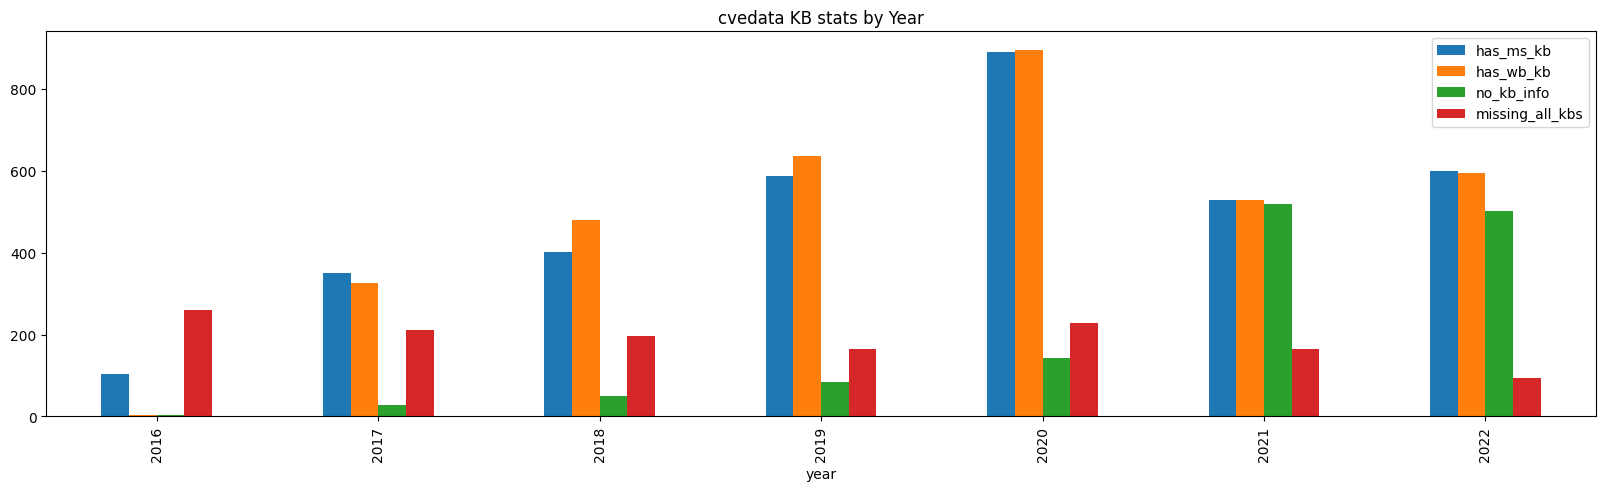

In [31]:
msrc_df['year'] = msrc_df['Initial Release'].apply(lambda x: x.split('-')[0])

msrc_df.reset_index().groupby(by='year')['index','has_ms_kb','has_wb_kb','no_kb_info','missing_all_kbs'].sum().plot(kind='bar',figsize=(20,5), title='cvedata KB stats by Year')


### How Many Per Month in 2022?

/var/folders/qb/5d749j6s5751hzqrj_pqc6x80000gn/T/ipykernel_20442/1465512147.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  msrc_date_df = msrc_df.groupby(by='date')['has_ms_kb','has_wb_kb','no_kb_info','missing_all_kbs'].sum()


<AxesSubplot: title={'center': 'cvedata KB stats for 2022'}, xlabel='date'>

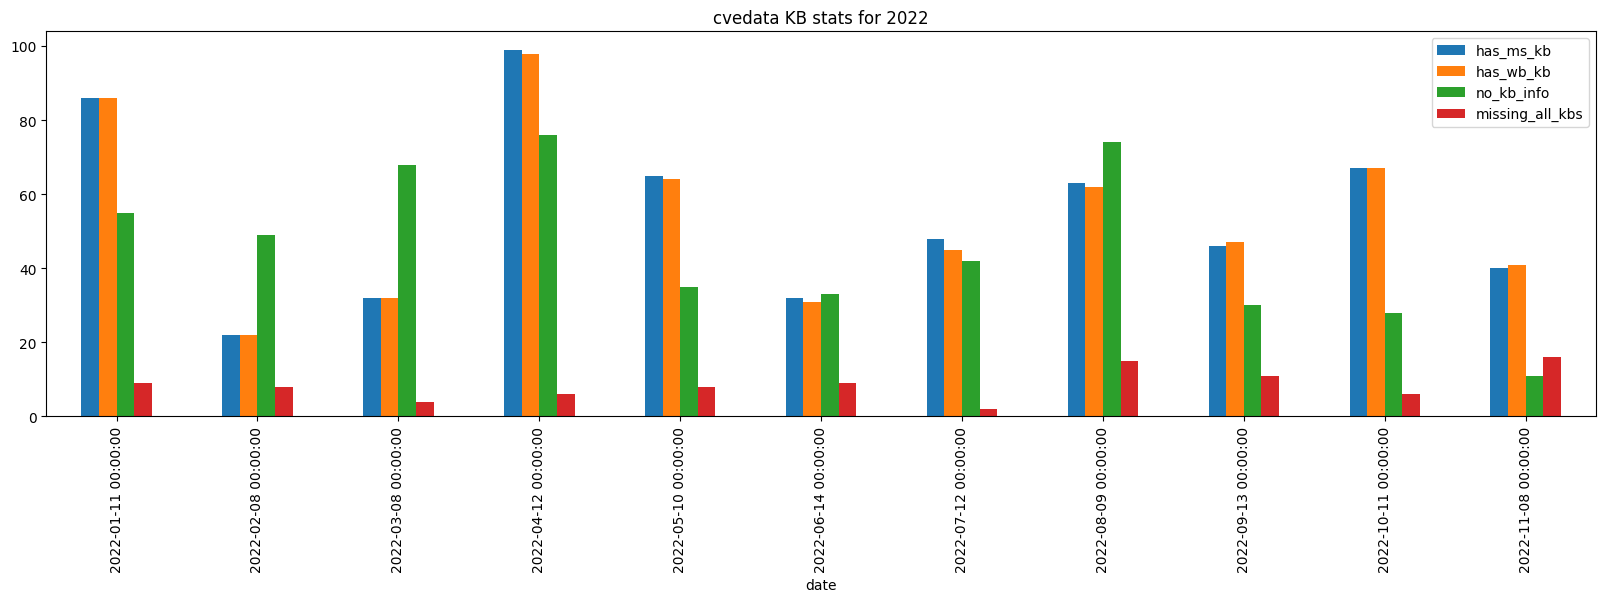

In [30]:
msrc_df['date'] = pd.to_datetime(msrc_df['Initial Release'])
msrc_date_df = msrc_df.groupby(by='date')['has_ms_kb','has_wb_kb','no_kb_info','missing_all_kbs'].sum()
msrc_date_df[msrc_date_df.index.year.isin([2022])].plot(kind='bar',figsize=(20,5), title='cvedata KB stats for 2022')


### What type of CVEs are we missing KBs for?

In [8]:

msrc_df[msrc_df['missing_all_kbs'] == True]['Title'].value_counts()[:50]

Microsoft Office                                                    155
Microsoft SharePoint                                                126
Microsoft Excel                                                     113
Microsoft SharePoint Server                                          68
Microsoft Exchange Server                                            61
Microsoft Office SharePoint XSS                                      54
Microsoft Outlook                                                    34
Microsoft Word                                                       34
Scripting Engine                                                     34
Microsoft Exchange                                                   32
Windows Uniscribe                                                    29
Windows GDI                                                          29
Windows Kernel                                                       29
Internet Explorer                                               

<AxesSubplot: title={'center': 'Types of CVEs missing related KBs sources'}>

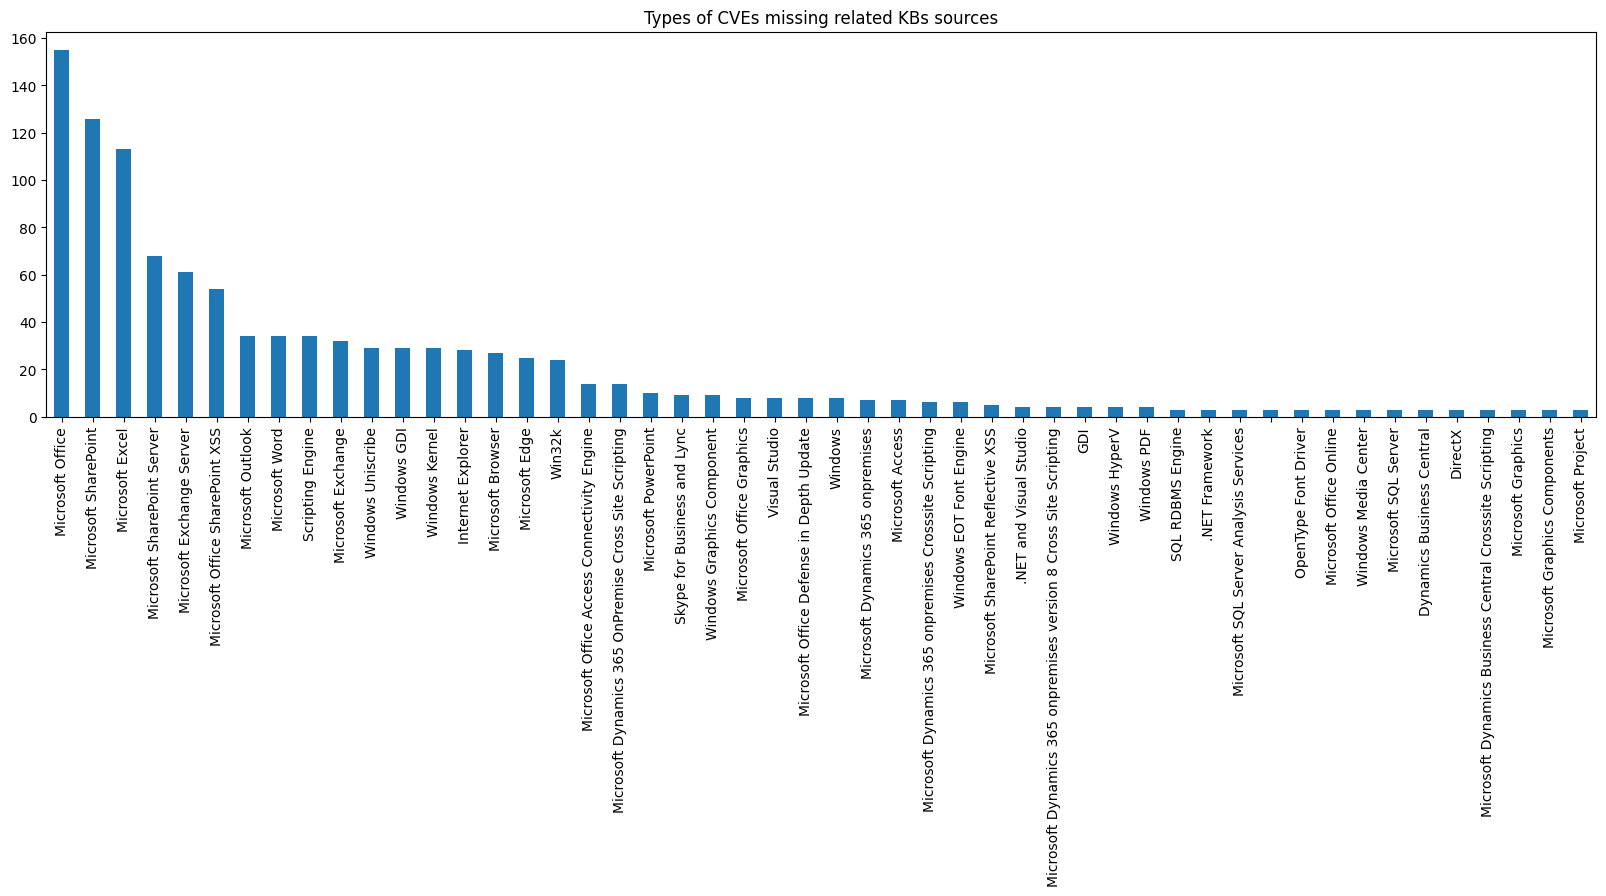

In [32]:
msrc_df[msrc_df['missing_all_kbs'] == True]['Title'].value_counts()[:50].plot(kind='bar',figsize=(20,5), title='Types of CVEs missing related KBs sources')

## KB Source Improvement

### What type of CVEs lack KB information completely?

In [10]:
msrc_df[msrc_df['no_kb_info'] == True]['Tag'].value_counts()[:50]

Microsoft Edge (Chromium-based)          643
Azure Site Recovery                       80
Microsoft Windows Codecs Library          73
Microsoft Office                          56
Visual Studio                             51
Visual Studio Code                        29
Azure Sphere                              27
Team Foundation Server                    21
Azure                                     20
Microsoft Malware Protection Engine       19
Azure Real Time Operating System          19
Microsoft Scripting Engine                17
Open Source Software                      15
Azure DevOps                              13
Microsoft Defender for IoT                12
Windows Defender                          12
ASP.NET                                   12
Microsoft Office Visio                     9
.NET Core                                  9
SQL Server                                 7
Microsoft Dynamics                         7
Windows Hyper-V                            6
Microsoft 

<AxesSubplot: title={'center': 'Types of CVEs without KB data listed'}>

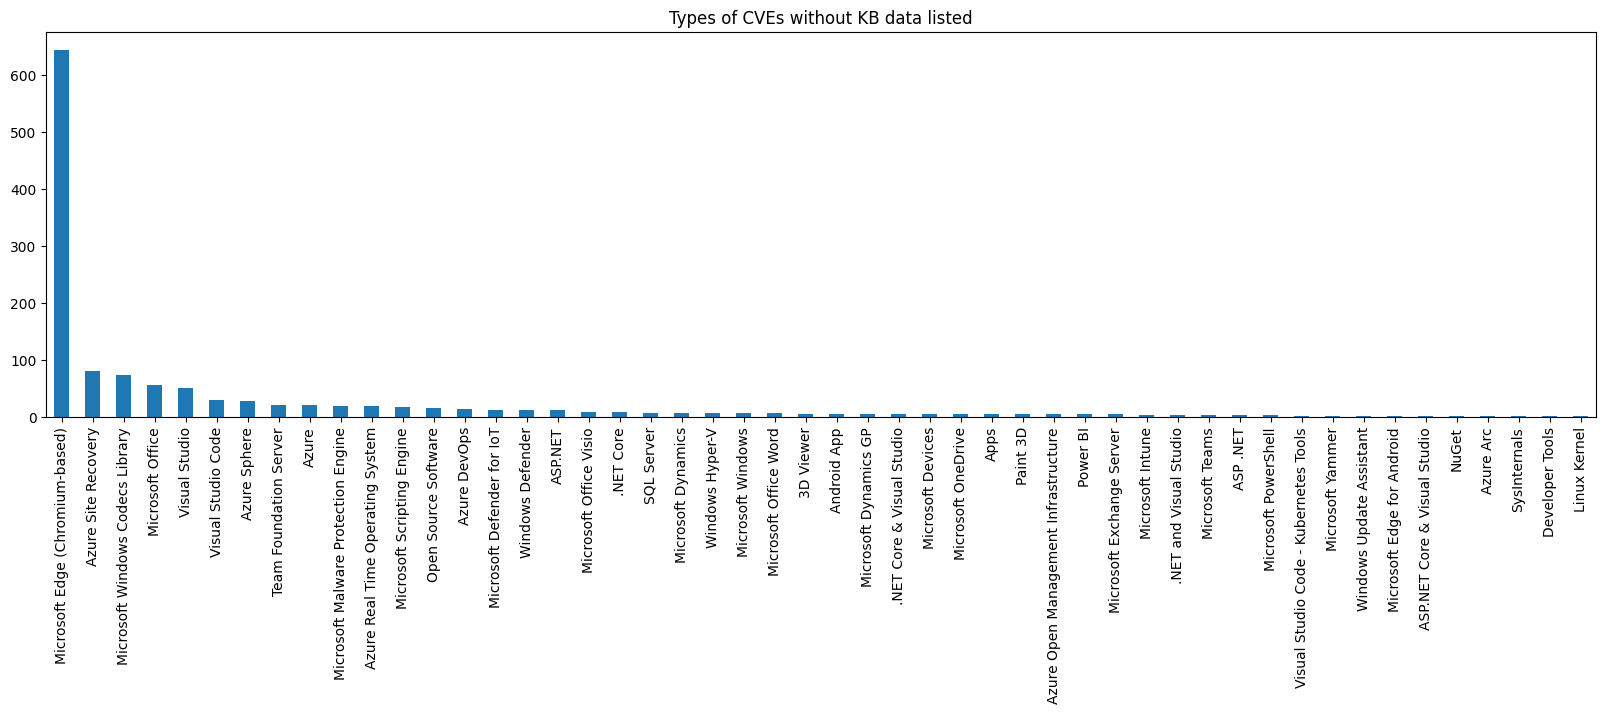

In [33]:
msrc_df[msrc_df['no_kb_info'] == True]['Tag'].value_counts()[:50].plot(kind='bar',figsize=(20,5), title='Types of CVEs without KB data listed')

## Most often updated Binary

### Create Dataframe from all sources

In [12]:
import itertools
all_kbs_df = pd.concat([wb_kbs_df,ms_kbs_df]).sort_index()
all_kbs_df.index.name = 'kb'
all_kbs_df = all_kbs_df.groupby('kb').aggregate(list)
all_kbs_df['updated'] = all_kbs_df['updated'].apply(lambda x: list(set(itertools.chain.from_iterable(x))))
all_kbs_df

,updated,versions,release,url,build,bin count
kb,,,,,,
KB3194798,"[Cloudexperiencehostcommon.dll, Userdeviceregi...",[nan],[2016-10-11],[nan],[14393.321],[173]
KB3197954,"[Dcm.networkmanager.dll, Sdndiagnosticsprovide...",[nan],[2016-10-27],[nan],[14393.351],[388]
KB3200970,"[Emt.exe, Dcm.networkmanager.dll, Imjpdapi.dll...",[nan],[2016-11-08],[nan],[14393.447],[359]
KB3201845,"[Dcm.networkmanager.dll, Zipfldr.dll, Kernelba...",[nan],[2016-12-09],[nan],[14393.479],[377]
KB3206632,"[Dcm.networkmanager.dll, Winload.efi, Sspicli....",[nan],[2016-12-13],[nan],[14393.576],[135]
...,...,...,...,...,...,...
KB5020387,"[AdaptiveCards.ObjectModel.Uwp.dll, schannel.d...","[[11-21H2], nan]","[2022-10-17, 2022-10-17]","[https://support.microsoft.com/help/5020387, nan]","[22000.1100, 22000.11]","[4, 5]"
KB5020436,"[tcblaunch.exe, tcbloader.dll, schannel.dll]",[nan],[2022-10-17],[nan],[20348.1131],[3]
KB5020438,"[sppsvc.exe, virtualtouchpadui.dll, peoplepane...",[[1809]],[2022-10-17],[https://support.microsoft.com/help/5020438],[17763.3534],[58]


In [13]:
freq_bins = all_kbs_df['updated'].explode().value_counts()
freq_bins.head(50)

ntoskrnl.exe                                           607
hvix64.exe                                             572
hvax64.exe                                             572
bootmgr.exe.mui                                        519
kdhvcom.dll                                            514
bootvhd.dll                                            514
mshtml.dll                                             511
hvservice.sys                                          482
win32kfull.sys                                         442
efisys.bin                                             436
efisys_noprompt.bin                                    436
win32k.sys                                             434
microsoft.msmq.activex.interop.dll                     432
microsoft.msmq.runtime.interop.dll                     432
microsoft.msmq.powershell.commands.dll                 432
microsoft.virtualization.client.rdpclientaxhost.dll    429
shell32.dll                                            4

<AxesSubplot: title={'center': 'Most Often Updated Binary'}>

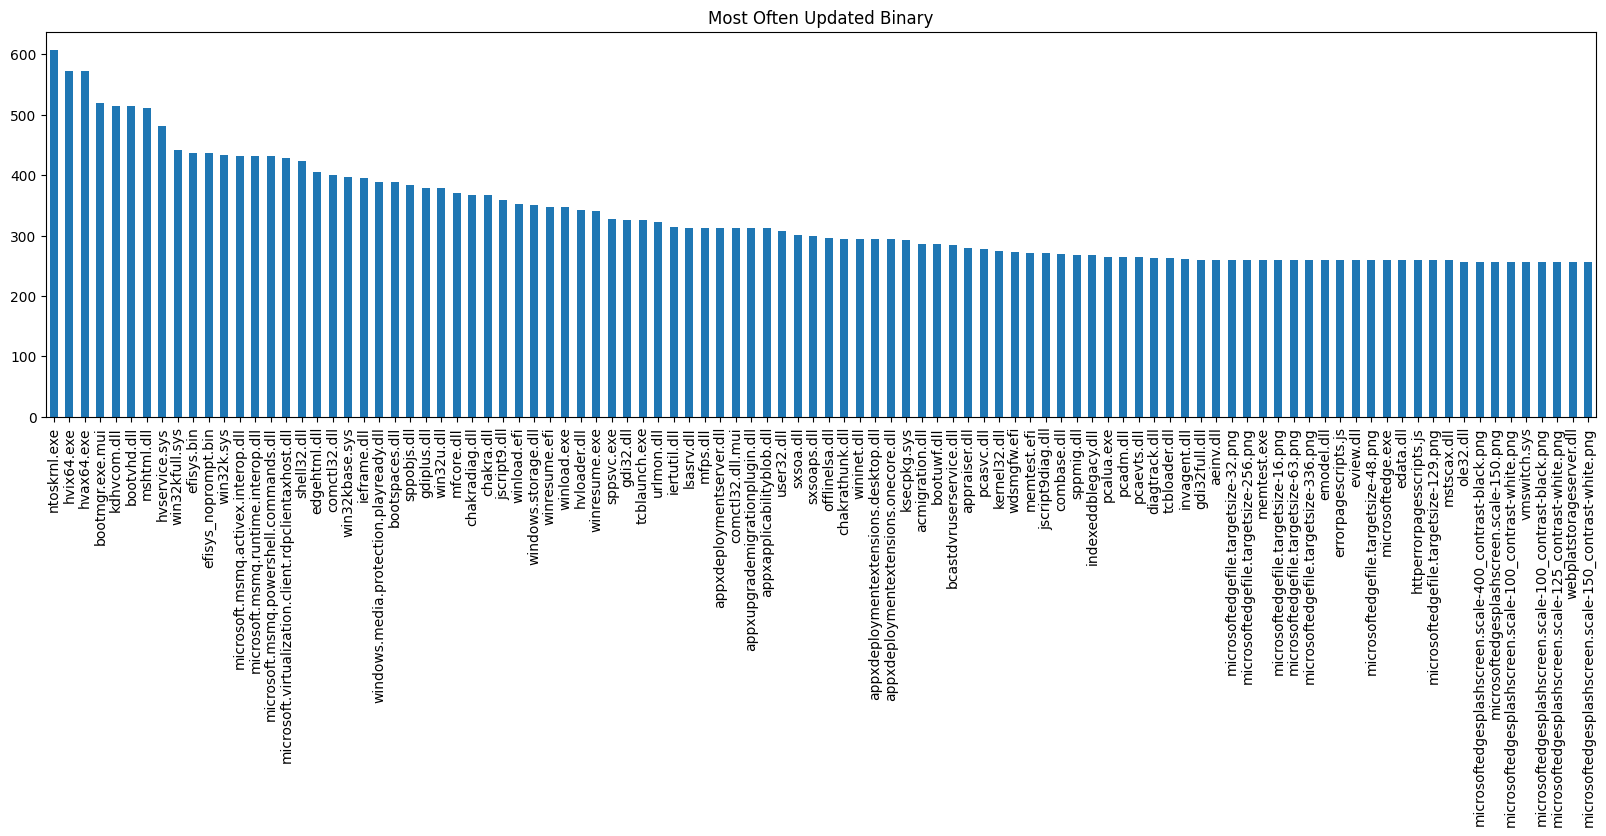

In [35]:
freq_bins[:100].plot(kind='bar',figsize=(20,5),title='Most Often Updated Binary')

### Graph number of updated files per KB 

<AxesSubplot: xlabel='kb'>

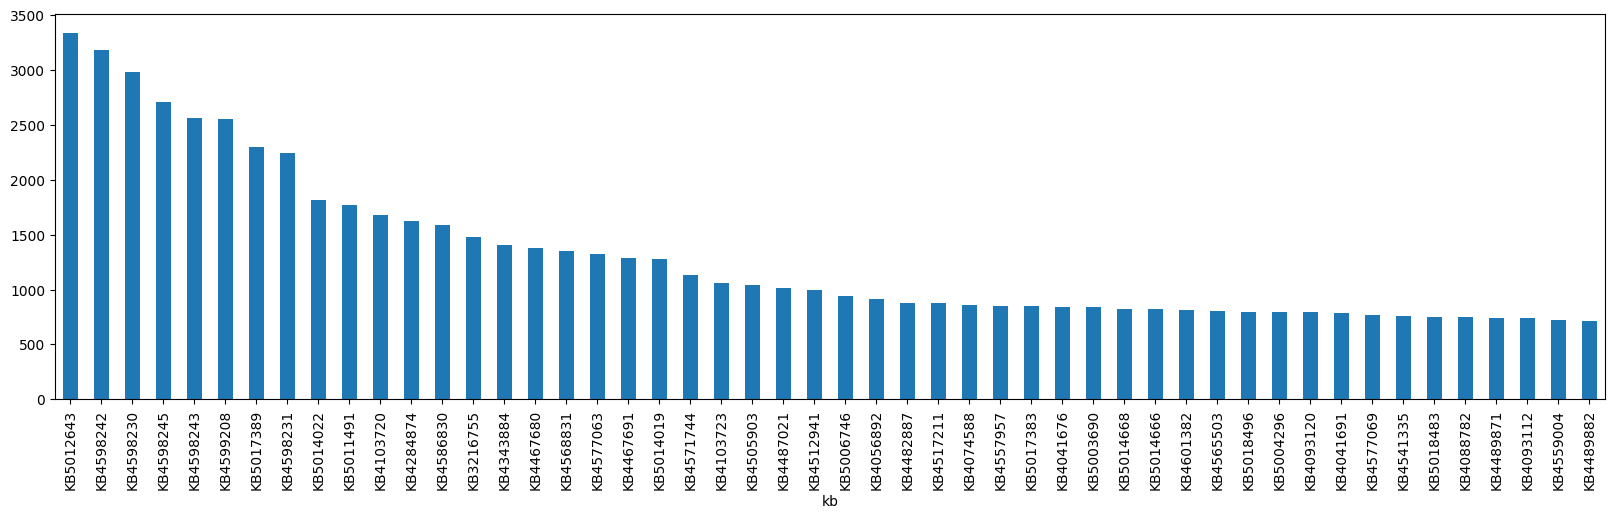

In [15]:
all_kbs_df['bin flat count'] = all_kbs_df['bin count'].apply(lambda x: x[0])
all_kbs_df['bin flat count'].sort_values(ascending=False)[:50].plot(kind='bar',figsize=(20,5))